# EE P 590: Deep Learning for Embedded Real-time Intelligence 

## Tutorial 1 

## Part (A) - Basics of DL frameworks 

### Installation 

Before installing any deep learning framework, please first check whether or not you have proper GPUs on your machine (the GPUs that power the display on a standard laptop are not relevant for our purposes). By default, the deep learning frameworks below are installed with GPU support. If your computer has NVIDIA GPUs and has installed CUDA (https://developer.nvidia.com/cuda-downloads), then you are all set.


If your machine does not house any GPUs, there is no need to worry!. Your CPU provides more than enough compute power to get you through most of the work for this course. Just remember that you will want to access GPUs if you wish to run larger models later on for your projects. We will try to provide you access to AWS cloud GPUs if required later in the course, however otherwise you can always use free GPU resources like Google Colab. 

In [1]:
# Install PyTorch 
!pip install torch torchvision 

# Install Tensorflow 
!pip install tensorflow tensorflow-probability 

For the most part we will stick to using Pytorch, as it a bit more beginner friendly and generally allows more flexibility to experiement. 

## Basic data types

In order to get anything done, we need some way to store and manipulate data.
Generally, there are two important things we need to do with data: (i) acquire
them; and (ii) process them once they are inside the computer.  There is no
point in acquiring data without some way to store it, so let us get our hands
dirty first by playing with synthetic data.  To start, we introduce the
$n$-dimensional array, which is also called the *tensor*. 

If you have worked with NumPy, the most widely-used
scientific computing package in Python,
then you will find this section familiar.
No matter which framework you use,
its *tensor class* (`ndarray` in MXNet,
`Tensor` in both PyTorch and TensorFlow) is similar to NumPy's `ndarray` with
a few killer features.
First, GPU is well-supported to accelerate the computation
whereas NumPy only supports CPU computation.
Second, the tensor class
supports automatic differentiation.
These properties make the tensor class suitable for deep learning.
Throughout the class, when we say tensors,
we are referring to instances of the tensor class unless otherwise stated.

We aim to get you up and running,
equipping you with the basic math and numerical computing tools
that you will build on as you progress through the course.
Do not worry if you struggle to grok some of
the mathematical concepts or library functions.
The following sections will revisit this material
in the context of practical examples and it will sink in.
On the other hand, if you already have some background
and want to go ahead, just skip this section.


**To start, we import `torch` and some useful utility functions (you don't have to worry about these). Note that though it's called PyTorch, we should
import `torch` instead of `pytorch`.**

In [2]:
import torch
from eep590_utils import *

**A tensor represents a (possibly multi-dimensional) array of numerical values.**
With one axis, a tensor is called a *vector*.
With two axes, a tensor is called a *matrix*.
With $k > 2$ axes, we drop the specialized names
and just refer to the object as a $k^\mathrm{th}$ *order tensor*.


PyTorch provides a variety of functions 
for creating new tensors 
prepopulated with values. 
For example, by invoking `arange(n)`,
we can create a vector of evenly spaced values,
starting at 0 (included) 
and ending at `n` (not included).
By default, the interval size is $1$.
Unless otherwise specified, 
new tensors are stored in main memory 
and designated for CPU-based computation.


In [3]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [4]:
x.shape

torch.Size([12])

To **change the shape of a tensor without altering
either the number of elements or their values**,
we can invoke the `reshape` function.
For example, we can transform our tensor, `x`,
from a row vector with shape (12,) to a matrix with shape (3, 4).
This new tensor contains the exact same values,
but views them as a matrix organized as 3 rows and 4 columns.
To reiterate, although the shape has changed,
the elements have not.
Note that the size is unaltered by reshaping.


In [5]:
X = x.reshape(3, 4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

Typically, we will want our matrices initialized
either with zeros, ones, some other constants,
or numbers randomly sampled from a specific distribution.
**We can create a tensor representing a tensor with all elements
set to 0** (~~or 1~~)
and a shape of (2, 3, 4) as follows:


In [6]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [7]:
# Similarly, we can create tensors with each element set to 1 as follows:

torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

Often, we want to randomly sample the values
for each element in a tensor from some probability distribution.
For example, when we construct arrays to serve
as parameters in a neural network, we will
typically initialize their values randomly.
The following snippet creates a tensor with shape (3, 4).
Each of its elements is randomly sampled
from a standard Gaussian (normal) distribution
with a mean of 0 and a standard deviation of 1.

In [8]:
torch.randn(3, 4)

tensor([[ 0.1253, -1.9389, -1.3876, -0.1049],
        [ 0.3558,  0.9738, -0.5509,  0.8663],
        [ 1.5569,  0.7816, -0.1649,  1.2567]])

In [9]:
# We can also specify the exact values for each element in the desired tensor by supplying a Python list (or list of lists) containing the numerical values. 
# Here, the outermost list corresponds to axis 0, and the inner list to axis 1.

torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

## Saving Memory

**Running operations can cause new memory to be
allocated to host results.**
For example, if we write `Y = X + Y`,
we will dereference the tensor that `Y` used to point to
and instead point `Y` at the newly allocated memory.
In the following example, we demonstrate this with Python's `id()` function,
which gives us the exact address of the referenced object in memory.
After running `Y = Y + X`, we will find that `id(Y)` points to a different location.
That is because Python first evaluates `Y + X`,
allocating new memory for the result and then makes `Y`
point to this new location in memory.


In [10]:
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
before = id(Y)
Y = Y + X
id(Y) == before

False

This might be undesirable for two reasons.
First, we do not want to run around
allocating memory unnecessarily all the time.
In machine learning, we might have
hundreds of megabytes of parameters
and update all of them multiple times per second.
Typically, we will want to perform these updates *in place*.
Second, we might point at the same parameters from multiple variables.
If we do not update in place, other references will still point to
the old memory location, making it possible for parts of our code
to inadvertently reference stale parameters.


Fortunately, **performing in-place operations** is easy.
We can assign the result of an operation
to a previously allocated array with slice notation,
e.g., `Y[:] = <expression>`.
To illustrate this concept, we first create a new matrix `Z`
with the same shape as another `Y`,
using `zeros_like` to allocate a block of $0$ entries.


In [11]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 139666927796880
id(Z): 139666927796880


**If the value of `X` is not reused in subsequent computations,
we can also use `X[:] = X + Y` or `X += Y`
to reduce the memory overhead of the operation.**


In [12]:
before = id(X)
X += Y
id(X) == before

True

### Conversion to Other Python Objects

**Converting to a NumPy tensor (`ndarray`)**, or vice versa, is easy.
The torch Tensor and numpy array will share their underlying memory
locations, and changing one through an in-place operation will also
change the other.


In [13]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [14]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

**You will find more basic tutorials on the pytorch webpage: https://pytorch.org/tutorials/**

Due to constraints on the length of this tutorial, we cannot possibly introduce every single PyTorch function and class (and you probably would not want us to). Here we will go through only some important details and tips. The API documentation and additional tutorials provide plenty of documentation beyond this tutorial. 


### Finding All the Functions and Classes in a Module

In order to know which functions and classes can be called in a module, we
invoke the `dir` function. For instance, we can (**query all properties in the
module for generating random numbers**):


In [15]:
print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weibull', 'Wishart', '__all__', '__builtins__', '__cached__'

Generally, we can ignore functions that start and end with `__` (special objects in Python) or functions that start with a single `_`(usually internal functions). Based on the remaining function or attribute names, we might hazard a guess that this module offers various methods for generating random numbers, including sampling from the uniform distribution (`uniform`), normal distribution (`normal`), and multinomial distribution  (`multinomial`).

### Finding the Usage of Specific Functions and Classes

For more specific instructions on how to use a given function or class, we can invoke the  `help` function. As an example, let us **explore the usage instructions for tensors' `ones` function**.


In [16]:
help(torch.ones)

Help on built-in function ones:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, uses the cur

## Part (B) Mathematics for ML



Let us briefly review the subset of mathematics and optimization that you will need to understand and implement
most of content covered in the lectures.

### (i) Norms

Some of the most useful operators in linear algebra are *norms*.
Informally, the norm of a vector tells us how *big* a vector is.
The notion of *size* under consideration here
concerns not dimensionality
but rather the magnitude of the components.

In linear algebra, a vector norm is a function $f$ that maps a vector
to a scalar, satisfying a handful of properties.
Given any vector $\mathbf{x}$,
the first property says
that if we scale all the elements of a vector
by a constant factor $\alpha$,
its norm also scales by the *absolute value*
of the same constant factor:

$$f(\alpha \mathbf{x}) = |\alpha| f(\mathbf{x}).$$


The second property is the familiar triangle inequality:

$$f(\mathbf{x} + \mathbf{y}) \leq f(\mathbf{x}) + f(\mathbf{y}).$$


The third property simply says that the norm must be non-negative:

$$f(\mathbf{x}) \geq 0.$$

That makes sense, as in most contexts the smallest *size* for anything is 0.
The final property requires that the smallest norm is achieved and only achieved
by a vector consisting of all zeros.

$$\forall i, [\mathbf{x}]_i = 0 \Leftrightarrow f(\mathbf{x})=0.$$

You might notice that norms sound a lot like measures of distance.
And if you remember Euclidean distances
(think Pythagoras' theorem) from grade school,
then the concepts of non-negativity and the triangle inequality might ring a bell.
In fact, the Euclidean distance is a norm:
specifically it is the $L_2$ norm.
Suppose that the elements in the $n$-dimensional vector
$\mathbf{x}$ are $x_1, \ldots, x_n$.

**The $L_2$ *norm* of $\mathbf{x}$ is the square root of the sum of the squares of the vector elements:**

**$$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2},$$**


where the subscript $2$ is often omitted in $L_2$ norms, i.e., $\|\mathbf{x}\|$ is equivalent to $\|\mathbf{x}\|_2$. In code,
we can calculate the $L_2$ norm of a vector as follows.


In [17]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In deep learning, we work more often
with the squared $L_2$ norm.

You will also frequently encounter **the $L_1$ *norm***,
which is expressed as the sum of the absolute values of the vector elements:

**$$\|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right|.$$**


As compared with the $L_2$ norm,
it is less influenced by outliers.
To calculate the $L_1$ norm, we compose
the absolute value function with a sum over the elements.


In [18]:
torch.abs(u).sum()

tensor(7.)

Both the $L_2$ norm and the $L_1$ norm
are special cases of the more general $L_p$ *norm*:

$$\|\mathbf{x}\|_p = \left(\sum_{i=1}^n \left|x_i \right|^p \right)^{1/p}.$$

Analogous to $L_2$ norms of vectors,
**the *Frobenius norm* of a matrix $\mathbf{X} \in \mathbb{R}^{m \times n}$**
is the square root of the sum of the squares of the matrix elements:

**$$\|\mathbf{X}\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n x_{ij}^2}.$$**

The Frobenius norm satisfies all the properties of vector norms.
It behaves as if it were an $L_2$ norm of a matrix-shaped vector.
Invoking the following function will calculate the Frobenius norm of a matrix.


In [19]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

In deep learning, we are often trying to solve optimization problems:
*maximize* the probability assigned to observed data;
*minimize* the distance between predictions
and the ground-truth observations.
Assign vector representations to items (like words, products, or news articles)
such that the distance between similar items is minimized,
and the distance between dissimilar items is maximized.
Oftentimes, the objectives, perhaps the most important components
of deep learning algorithms (besides the data),
are expressed as norms.


## (ii) Eigendecompositions

Eigenvalues are often one of the most useful notions 
we will encounter when studying linear algebra, 
however, as a beginner, it is easy to overlook their importance.
Below, we introduce eigendecomposition and 
try to convey some sense of just why it is so important. 

Suppose that we have a matrix $A$ with the following entries:

$$
\mathbf{A} = \begin{bmatrix}
2 & 0 \\
0 & -1
\end{bmatrix}.
$$

If we apply $A$ to any vector $\mathbf{v} = [x, y]^\top$, 
we obtain a vector $\mathbf{A}\mathbf{v} = [2x, -y]^\top$.
This has an intuitive interpretation:
stretch the vector to be twice as wide in the $x$-direction,
and then flip it in the $y$-direction.

However, there are *some* vectors for which something remains unchanged.
Namely $[1, 0]^\top$ gets sent to $[2, 0]^\top$
and $[0, 1]^\top$ gets sent to $[0, -1]^\top$.
These vectors are still in the same line,
and the only modification is that the matrix stretches them
by a factor of $2$ and $-1$ respectively.
We call such vectors *eigenvectors*
and the factor they are stretched by *eigenvalues*.

In general, if we can find a number $\lambda$ 
and a vector $\mathbf{v}$ such that 

$$
\mathbf{A}\mathbf{v} = \lambda \mathbf{v}.
$$

We say that $\mathbf{v}$ is an eigenvector for $A$ and $\lambda$ is an eigenvalue.

## Finding Eigenvalues
Let us figure out how to find them. By subtracting off the $\lambda \mathbf{v}$ from both sides,
and then factoring out the vector,
we see the above is equivalent to:

$$(\mathbf{A} - \lambda \mathbf{I})\mathbf{v} = 0.$$

For to happen, we see that $(\mathbf{A} - \lambda \mathbf{I})$ 
must compress some direction down to zero, 
hence it is not invertible, and thus the determinant is zero.
Thus, we can find the *eigenvalues* 
by finding for what $\lambda$ is $\det(\mathbf{A}-\lambda \mathbf{I}) = 0$.
Once we find the eigenvalues, we can solve 
$\mathbf{A}\mathbf{v} = \lambda \mathbf{v}$ 
to find the associated *eigenvector(s)*.

### An Example
Let us see this with a more challenging matrix

$$
\mathbf{A} = \begin{bmatrix}
2 & 1\\
2 & 3 
\end{bmatrix}.
$$

If we consider $\det(\mathbf{A}-\lambda \mathbf{I}) = 0$, 
we see this is equivalent to the polynomial equation
$0 = (2-\lambda)(3-\lambda)-2 = (4-\lambda)(1-\lambda)$.
Thus, two eigenvalues are $4$ and $1$.
To find the associated vectors, we then need to solve

$$
\begin{bmatrix}
2 & 1\\
2 & 3 
\end{bmatrix}\begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix}x \\ y\end{bmatrix}  \; \text{and} \;
\begin{bmatrix}
2 & 1\\
2 & 3 
\end{bmatrix}\begin{bmatrix}x \\ y\end{bmatrix}  = \begin{bmatrix}4x \\ 4y\end{bmatrix} .
$$

We can solve this with the vectors $[1, -1]^\top$ and $[1, 2]^\top$ respectively.

We can check this in code using the built-in `numpy.linalg.eig` routine.


In [20]:
torch.eig(torch.tensor([[2, 1], [2, 3]], dtype=torch.float64),
          eigenvectors=True)

/home/kegedy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: torch.eig is deprecated in favor of torch.linalg.eig and will be removed in a future PyTorch release.
torch.linalg.eig returns complex tensors of dtype cfloat or cdouble rather than real tensors mimicking complex tensors.
L, _ = torch.eig(A)
should be replaced with
L_complex = torch.linalg.eigvals(A)
and
L, V = torch.eig(A, eigenvectors=True)
should be replaced with
L_complex, V_complex = torch.linalg.eig(A) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2910.)
  


torch.return_types.eig(
eigenvalues=tensor([[1., 0.],
        [4., 0.]], dtype=torch.float64),
eigenvectors=tensor([[-0.7071, -0.4472],
        [ 0.7071, -0.8944]], dtype=torch.float64))

In [21]:
L_complex, V_complex = torch.linalg.eig(torch.tensor([[2, 1], [2, 3]], dtype=torch.float64))
L_complex, V_complex

(tensor([1.+0.j, 4.+0.j], dtype=torch.complex128),
 tensor([[-0.7071+0.j, -0.4472+0.j],
         [ 0.7071+0.j, -0.8944+0.j]], dtype=torch.complex128))

## Decomposing Matrices
Let us continue the previous example one step further.  Let

$$
\mathbf{W} = \begin{bmatrix}
1 & 1 \\
-1 & 2
\end{bmatrix},
$$

be the matrix where the columns are the eigenvectors of the matrix $\mathbf{A}$. Let

$$
\boldsymbol{\Sigma} = \begin{bmatrix}
1 & 0 \\
0 & 4
\end{bmatrix},
$$

be the matrix with the associated eigenvalues on the diagonal.
Then the definition of eigenvalues and eigenvectors tells us that

$$
\mathbf{A}\mathbf{W} =\mathbf{W} \boldsymbol{\Sigma} .
$$

The matrix $W$ is invertible, so we may multiply both sides by $W^{-1}$ on the right,
we see that we may write

$$\mathbf{A} = \mathbf{W} \boldsymbol{\Sigma} \mathbf{W}^{-1}.$$

We need only know that such a decomposition 
will exist as long as we can find a full collection 
of linearly independent eigenvectors (so that $W$ is invertible).

## Operations on Eigendecompositions
One nice thing about eigendecompositions is that 
we can write many operations we usually encounter cleanly 
in terms of the eigendecomposition. As a first example, consider:

$$
\mathbf{A}^n = \overbrace{\mathbf{A}\cdots \mathbf{A}}^{\text{$n$ times}} = \overbrace{(\mathbf{W}\boldsymbol{\Sigma} \mathbf{W}^{-1})\cdots(\mathbf{W}\boldsymbol{\Sigma} \mathbf{W}^{-1})}^{\text{$n$ times}} =  \mathbf{W}\overbrace{\boldsymbol{\Sigma}\cdots\boldsymbol{\Sigma}}^{\text{$n$ times}}\mathbf{W}^{-1} = \mathbf{W}\boldsymbol{\Sigma}^n \mathbf{W}^{-1}.
$$

This tells us that for any positive power of a matrix,
the eigendecomposition is obtained by just raising the eigenvalues to the same power.
The same can be shown for negative powers,
so if we want to invert a matrix we need only consider

$$
\mathbf{A}^{-1} = \mathbf{W}\boldsymbol{\Sigma}^{-1} \mathbf{W}^{-1},
$$

or in other words, just invert each eigenvalue.
This will work as long as each eigenvalue is non-zero,
so we see that invertible is the same as having no zero eigenvalues.  

Indeed, additional work can show that if $\lambda_1, \ldots, \lambda_n$ 
are the eigenvalues of a matrix, then the determinant of that matrix is

$$
\det(\mathbf{A}) = \lambda_1 \cdots \lambda_n,
$$

or the product of all the eigenvalues.
This makes sense intuitively because whatever stretching $\mathbf{W}$ does, 
$W^{-1}$ undoes it, so in the end the only stretching that happens is 
by multiplication by the diagonal matrix $\boldsymbol{\Sigma}$, 
which stretches volumes by the product of the diagonal elements.

Finally, recall that the rank was the maximum number 
of linearly independent columns of your matrix.
By examining the eigendecomposition closely,
we can see that the rank is the same 
as the number of non-zero eigenvalues of $\mathbf{A}$.

The examples could continue, but hopefully the point is clear:
eigendecomposition can simplify many linear-algebraic computations
and is a fundamental operation underlying many numerical algorithms
and much of the analysis that we do in linear algebra. 

## Eigendecompositions of Symmetric Matrices
It is not always possible to find enough linearly independent eigenvectors 
for the above process to work. For instance the matrix

$$
\mathbf{A} = \begin{bmatrix}
1 & 1 \\
0 & 1
\end{bmatrix},
$$

has only a single eigenvector, namely $(1, 0)^\top$. 
To handle such matrices, we require more advanced techniques 
than we can cover (such as the Jordan Normal Form, or Singular Value Decomposition).
We will often need to restrict our attention to those matrices 
where we can guarantee the existence of a full set of eigenvectors.

The most commonly encountered family are the *symmetric matrices*,
which are those matrices where $\mathbf{A} = \mathbf{A}^\top$. 
In this case, we may take $W$ to be an *orthogonal matrix*—a matrix whose columns are all length one vectors that are at right angles to one another, where 
$\mathbf{W}^\top = \mathbf{W}^{-1}$—and all the eigenvalues will be real.  
Thus, in this special case, we can write as

$$
\mathbf{A} = \mathbf{W}\boldsymbol{\Sigma}\mathbf{W}^\top .
$$


There is a lot more to linear algebra
and a lot of that is useful for machine learning.
For example, matrices can be decomposed into factors,
and these decompositions can reveal
low-dimensional structure in real-world datasets.
There are entire subfields of machine learning
that focus on using matrix decompositions
and their generalizations to high-order tensors
to discover structure in datasets and solve prediction problems. However, we will wrap up this section here.

To learn and practice more linear algebra,
you may refer to excellent resources like [prof. Gilbert Strang's book on linear algebra](https://math.mit.edu/~gs/linearalgebra/).

## (iii) Convexity

Convexity plays a vital role in the design of optimization algorithms. 
This is largely due to the fact that it is much easier to analyze and test algorithms in such a context. 
In other words,
if the algorithm performs poorly even in the convex setting,
typically we should not hope to see great results otherwise. 
Furthermore, even though the optimization problems in deep learning are generally nonconvex, they often exhibit some properties of convex ones near local minima. 


## Definitions

Before convex analysis,
we need to define *convex sets* and *convex functions*.
They lead to mathematical tools that are commonly applied to machine learning.


### Convex Sets

Sets are the basis of convexity. Simply put, a set $\mathcal{X}$ in a vector space is *convex* if for any $a, b \in \mathcal{X}$ the line segment connecting $a$ and $b$ is also in $\mathcal{X}$. In mathematical terms this means that for all $\lambda \in [0, 1]$ we have

$$\lambda  a + (1-\lambda)  b \in \mathcal{X} \text{ whenever } a, b \in \mathcal{X}.$$

This sounds a bit abstract. Consider the figures. The first set is not convex since there exist line segments that are not contained in it.
The other two sets suffer no such problem.

The first set is nonconvex and the other two are convex.
![pacman](pacman.svg)

Definitions on their own are not particularly useful unless you can do something with them.
In this case we can look at intersections.
Assume that $\mathcal{X}$ and $\mathcal{Y}$ are convex sets. Then $\mathcal{X} \cap \mathcal{Y}$ is also convex. To see this, consider any $a, b \in \mathcal{X} \cap \mathcal{Y}$. Since $\mathcal{X}$ and $\mathcal{Y}$ are convex, the line segments connecting $a$ and $b$ are contained in both $\mathcal{X}$ and $\mathcal{Y}$. Given that, they also need to be contained in $\mathcal{X} \cap \mathcal{Y}$, thus proving our theorem.

**The intersection between two convex sets is convex.**
![int](convex-intersect.svg)

We can strengthen this result with little effort: given convex sets $\mathcal{X}_i$, their intersection $\cap_{i} \mathcal{X}_i$ is convex.
To see that the converse is not true, consider two disjoint sets $\mathcal{X} \cap \mathcal{Y} = \emptyset$. Now pick $a \in \mathcal{X}$ and $b \in \mathcal{Y}$. The line segment connecting $a$ and $b$ needs to contain some part that is neither in $\mathcal{X}$ nor in $\mathcal{Y}$, since we assumed that $\mathcal{X} \cap \mathcal{Y} = \emptyset$. Hence the line segment is not in $\mathcal{X} \cup \mathcal{Y}$ either, thus proving that in general unions of convex sets need not be convex.

**The union of two convex sets need not be convex.**
![union](nonconvex.svg)

Typically the problems in deep learning are defined on convex sets. For instance, $\mathbb{R}^d$,
the set of $d$-dimensional vectors of real numbers,
is a convex set (after all, the line between any two points in $\mathbb{R}^d$ remains in $\mathbb{R}^d$). In some cases we work with variables of bounded length, such as balls of radius $r$ as defined by $\{\mathbf{x} | \mathbf{x} \in \mathbb{R}^d \text{ and } \|\mathbf{x}\| \leq r\}$.

### Convex Functions

Now that we have convex sets we can introduce *convex functions* $f$.
Given a convex set $\mathcal{X}$, a function $f: \mathcal{X} \to \mathbb{R}$ is *convex* if for all $x, x' \in \mathcal{X}$ and for all $\lambda \in [0, 1]$ we have

$$\lambda f(x) + (1-\lambda) f(x') \geq f(\lambda x + (1-\lambda) x').$$

To illustrate this let us plot a few functions and check which ones satisfy the requirement.
Below we define a few functions, both convex and nonconvex.


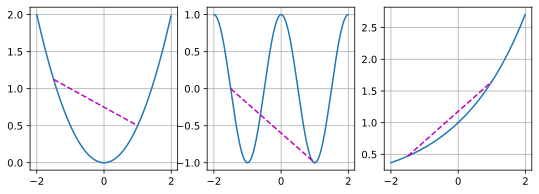

In [22]:
pi = 3.141592741012
f = lambda x: 0.5 * x**2  # Convex
g = lambda x: torch.cos(pi * x)  # Nonconvex
h = lambda x: torch.exp(0.5 * x)  # Convex

x, segment = torch.arange(-2, 2, 0.01), torch.tensor([-1.5, 1])
use_svg_display()
_, axes = plt.subplots(1, 3, figsize=(9, 3))
for ax, func in zip(axes, [f, g, h]):
    plot([x, segment], [func(x), func(segment)], axes=ax)

### Jensen's Inequality

Given a convex function $f$,
one of the most useful mathematical tools
is *Jensen's inequality*.
It amounts to a generalization of the definition of convexity:

$$\sum_i \alpha_i f(x_i)  \geq f\left(\sum_i \alpha_i x_i\right)    \text{ and }    E_X[f(X)]  \geq f\left(E_X[X]\right),$$

where $\alpha_i$ are nonnegative real numbers such that $\sum_i \alpha_i = 1$ and $X$ is a random variable.
In other words, the expectation of a convex function is no less than the convex function of an expectation, where the latter is usually a simpler expression. 
To prove the first inequality we repeatedly apply the definition of convexity to one term in the sum at a time.


One of the common applications of Jensen's inequality is
to bound a more complicated expression by a simpler one.
For example,
its application can be
with regard to the log-likelihood of partially observed random variables. That is, we use

$$E_{Y \sim P(Y)}[-\log P(X \mid Y)] \geq -\log P(X),$$

since $\int P(Y) P(X \mid Y) dY = P(X)$. Here $Y$ is typically the unobserved random variable, $P(Y)$ is the best guess of how it might be distributed, and $P(X)$ is the distribution with $Y$ integrated out. For instance, in clustering $Y$ might be the cluster labels and $P(X \mid Y)$ is the generative model when applying cluster labels.




### Useful property of Convex functions:

The local minima of convex functions are also the global minima. 

For exampple, the convex function $f(x) = (x-1)^2$ has a local minimum at $x=1$, which is also the global minimum.


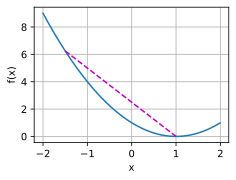

In [23]:
f = lambda x: (x - 1) ** 2
set_figsize()
plot([x, segment], [f(x), f(segment)], 'x', 'f(x)')

## (iv) Calculus and Autograd  


To illustrate derivatives,
let us first experiment with an example. **Define $u = f(x) = 3x^2-4x$.** 

In [24]:
def f(x):
    return 3 * x ** 2 - 4 * x

Using the derivative of $f(x)$ w.r.t $x$ we can **plot the function $u = f(x)$ and its tangent line at $x=1$**, where the coefficient $2$ is the slope of the tangent line.

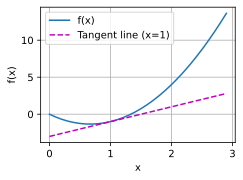

In [25]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

Differentiation is a crucial step in nearly all deep learning optimization algorithms.
While the calculations for taking these derivatives are straightforward,
requiring only some basic calculus,
for complex models, working out the updates by hand
can be a pain (and often error-prone).

Deep learning frameworks expedite this work
by automatically calculating derivatives, i.e., *automatic differentiation*.
In practice,
based on our designed model
the system builds a *computational graph*,
tracking which data combined through
which operations to produce the output.
Automatic differentiation enables the system to subsequently backpropagate gradients.
Here, *backpropagate* simply means to trace through the computational graph,
filling in the partial derivatives with respect to each parameter.


As a toy example, say that we are interested
in **differentiating the function
$y = 2\mathbf{x}^{\top}\mathbf{x}$
with respect to the column vector $\mathbf{x}$.**
To start, let us create the variable `x` and assign it an initial value.


In [26]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

**Before we even calculate the gradient
of $y$ with respect to $\mathbf{x}$,
we will need a place to store it.**
It is important that we do not allocate new memory
every time we take a derivative with respect to a parameter
because we will often update the same parameters
thousands or millions of times
and could quickly run out of memory.
Note that a gradient of a scalar-valued function
with respect to a vector $\mathbf{x}$
is itself vector-valued and has the same shape as $\mathbf{x}$.


In [27]:
x.requires_grad_(True)  # Same as `x = torch.arange(4.0, requires_grad=True)`
x.grad  # The default value is None

In [28]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

Since `x` is a vector of length 4,
an dot product of `x` and `x` is performed,
yielding the scalar output that we assign to `y`.
Next, **we can automatically calculate the gradient of `y`
with respect to each component of `x`**
by calling the function for backpropagation and printing the gradient.


In [29]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

**The gradient of the function $y = 2\mathbf{x}^{\top}\mathbf{x}$
with respect to $\mathbf{x}$ should be $4\mathbf{x}$.**
Let us quickly verify that our desired gradient was calculated correctly.

In [30]:
x.grad == 4 * x

tensor([True, True, True, True])

In [31]:
# Example 2:
# PyTorch accumulates the gradient in default, we need to clear the previous
# values
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### Backward for Non-Scalar Variables

Technically, when `y` is not a scalar,
the most natural interpretation of the differentiation of a vector `y`
with respect to a vector `x` is a matrix.
For higher-order and higher-dimensional `y` and `x`,
the differentiation result could be a high-order tensor.

However, while these more exotic objects do show up
in advanced machine learning (including deep learning),
more often **when we are calling backward on a vector,**
we are trying to calculate the derivatives of the loss functions
for each constituent of a *batch* of training examples.
Here, **our intent is** not to calculate the differentiation matrix
but rather **the sum of the partial derivatives
computed individually for each example** in the batch.


In [32]:
# Invoking `backward` on a non-scalar requires passing in a `gradient` argument
# which specifies the gradient of the differentiated function w.r.t `self`.
# In our case, we simply want to sum the partial derivatives, so passing
# in a gradient of ones is appropriate
x.grad.zero_()
y = x * x
# y.backward(torch.ones(len(x))) equivalent to the below
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

### Detaching Computation

Sometimes, we wish to **move some calculations
outside of the recorded computational graph.**
For example, say that `y` was calculated as a function of `x`,
and that subsequently `z` was calculated as a function of both `y` and `x`.
Now, imagine that we wanted to calculate
the gradient of `z` with respect to `x`,
but wanted for some reason to treat `y` as a constant,
and only take into account the role
that `x` played after `y` was calculated.

Here, we can detach `y` to return a new variable `u`
that has the same value as `y` but discards any information
about how `y` was computed in the computational graph.
In other words, the gradient will not flow backwards through `u` to `x`.
Thus, the following backpropagation function computes
the partial derivative of `z = u * x` with respect to `x` while treating `u` as a constant,
instead of the partial derivative of `z = x * x * x` with respect to `x`.


In [33]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

Since the computation of `y` was recorded,
we can subsequently invoke backpropagation on `y` to get the derivative of `y = x * x` with respect to `x`, which is `2 * x`.


In [34]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### Computing the Gradient of Python Control Flow

One benefit of using automatic differentiation
is that **even if** building the computational graph of **a function
required passing through a maze of Python control flow**
(e.g., conditionals, loops, and arbitrary function calls),
**we can still calculate the gradient of the resulting variable.**
In the following snippet, note that
the number of iterations of the `while` loop
and the evaluation of the `if` statement
both depend on the value of the input `a`.


In [35]:
def F(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [36]:
a = torch.randn(size=(), requires_grad=True)
d = F(a)
d.backward()

We can now analyze the `F` function defined above.
Note that it is piecewise linear in its input `a`.
In other words, for any `a` there exists some constant scalar `k`
such that `f(a) = k * a`, where the value of `k` depends on the input `a`.
Consequently `d / a` allows us to verify that the gradient is correct.


In [37]:
a.grad == d / a

tensor(True)

## Linear Regression and SGD 

In the class lecture, we cover the key ideas behind linear regression,
and now we can begin to work through a hands-on implementation in code.
In this section, **we will implement the entire method from scratch,
including the data pipeline, the model,
the loss function, and the minibatch stochastic gradient descent optimizer.** 
While modern deep learning frameworks can automate nearly all of this work,
implementing things from scratch is the only way
to make sure that you really know what you are doing.
Moreover, when it comes time to customize models,
defining our own layers or loss functions,
understanding how things work under the hood will prove handy.
In this section, we will rely only on tensors and auto differentiation.
Afterwards, we will use concise implementations,
taking advantage of bells and whistles of deep learning frameworks.


### Step 1: Generating the Dataset

To keep things simple, we will **construct an artificial dataset
according to a linear model with additive noise.**
Our task will be to recover this model's parameters
using the finite set of examples contained in our dataset.
We will keep the data low-dimensional so we can visualize it easily.
In the following code snippet, we generate a dataset
containing 1000 examples, each consisting of 2 features
sampled from a standard normal distribution.
Thus our synthetic dataset will be a matrix
$\mathbf{X}\in \mathbb{R}^{1000 \times 2}$.

**The true parameters generating our dataset will be
$\mathbf{w} = [2, -3.4]^\top$ and $b = 4.2$,
and** our synthetic labels will be assigned according
to the following linear model with the noise term $\epsilon$:

**$$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon.$$**

You could think of $\epsilon$ as capturing potential
measurement errors on the features and labels.
We will assume that the standard assumptions hold and thus
that $\epsilon$ obeys a normal distribution with mean of 0.
To make our problem easy, we will set its standard deviation to 0.01.
The following code generates our synthetic dataset.


In [38]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [39]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [40]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 0.3311, -0.9805]) 
label: tensor([8.2062])


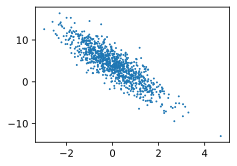

In [41]:
set_figsize()
plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

### Step 2: Reading the Dataset

Recall that training models consists of
making multiple passes over the dataset,
grabbing one minibatch of examples at a time,
and using them to update our model.
Since this process is so fundamental
to training machine learning algorithms,
it is worth defining a utility function
to shuffle the dataset and access it in minibatches.

In the following code, we **define the `data_iter` function**
to demonstrate one possible implementation of this functionality.
The function **takes a batch size, a matrix of features,
and a vector of labels, yielding minibatches of the size `batch_size`.**
Each minibatch consists of a tuple of features and labels.


In [1]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In general, note that we want to use reasonably sized minibatches
to take advantage of the GPU hardware,
which excels at parallelizing operations.
Because each example can be fed through our models in parallel
and the gradient of the loss function for each example can also be taken in parallel,
GPUs allow us to process hundreds of examples in scarcely more time
than it might take to process just a single example.

To build some intuition, let us read and print
the first small batch of data examples.
The shape of the features in each minibatch tells us
both the minibatch size and the number of input features.
Likewise, our minibatch of labels will have a shape given by `batch_size`.


In [43]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.9482, -0.3868],
        [ 2.1909, -2.2993],
        [ 0.5817, -0.9289],
        [-0.6556,  1.5659],
        [ 1.2670,  0.6379],
        [ 0.5730,  0.2782],
        [-1.2060,  0.5318],
        [ 0.1793, -0.9057],
        [-1.1464, -2.2191],
        [-0.5097, -0.9121]]) 
 tensor([[ 9.4124],
        [16.3949],
        [ 8.5177],
        [-2.4191],
        [ 4.5419],
        [ 4.4087],
        [-0.0328],
        [ 7.6560],
        [ 9.4484],
        [ 6.2842]])


As we run the iteration, we obtain distinct minibatches
successively until the entire dataset has been exhausted (try this).
While the iteration implemented above is good for didactic purposes,
it is inefficient in ways that might get us in trouble on real problems.
For example, it requires that we load all the data in memory
and that we perform lots of random memory access.
The built-in iterators implemented in a deep learning framework
are considerably more efficient and they can deal
with both data stored in files and data fed via data streams.


### Initializing Model Parameters

**Before we can begin optimizing our model's parameters** by minibatch stochastic gradient descent,
**we need to have some parameters in the first place.**
In the following code, we initialize weights by sampling
random numbers from a normal distribution with mean 0
and a standard deviation of 0.01, and setting the bias to 0.


In [44]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

After initializing our parameters,
our next task is to update them until
they fit our data sufficiently well.
Each update requires taking the gradient
of our loss function with respect to the parameters.
Given this gradient, we can update each parameter
in the direction that may reduce the loss.

Since nobody wants to compute gradients explicitly
(this is tedious and error prone),
we use automatic differentiation to compute the gradient.


###  Step 3: Defining the Model

Next, we must **define our model,
relating its inputs and parameters to its outputs.**
Recall that to calculate the output of the linear model,
we simply take the matrix-vector dot product
of the input features $\mathbf{X}$ and the model weights $\mathbf{w}$,
and add the offset $b$ to each example.
Note that below $\mathbf{Xw}$  is a vector and $b$ is a scalar.


In [45]:
def linreg(X, w, b):  
    """The linear regression model."""
    return torch.matmul(X, w) + b

### Step 4: Defining the Loss Function

Since **updating our model requires taking
the gradient of our loss function,**
we ought to **define the loss function first.**
Here we will use the squared loss function
as defined in the lecture slides.
In the implementation, we need to transform the true value `y`
into the predicted value's shape `y_hat`.
The result returned by the following function
will also have the same shape as `y_hat`.


In [46]:
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### Step 5: Defining the Optimization Algorithm

As we discussed in class,
linear regression has a closed-form solution.
However, since many other deep learning models cannot be solved analytically, we will take this opportunity to introduce your first working example of minibatch stochastic gradient descent.


At each step, using one minibatch randomly drawn from our dataset,
we will estimate the gradient of the loss with respect to our parameters.
Next, we will update our parameters
in the direction that may reduce the loss.
The following code applies the minibatch stochastic gradient descent update,
given a set of parameters, a learning rate, and a batch size.
The size of the update step is determined by the learning rate `lr`.
Because our loss is calculated as a sum over the minibatch of examples,
we normalize our step size by the batch size (`batch_size`),
so that the magnitude of a typical step size
does not depend heavily on our choice of the batch size.


In [47]:
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### Step 5: Training

Now that we have all of the parts in place,
we are ready to **implement the main training loop.**
It is crucial that you understand this code
because you will see nearly identical training loops
over and over again throughout your career in deep learning.

In each iteration, we will grab a minibatch of training examples,
and pass them through our model to obtain a set of predictions.
After calculating the loss, we initiate the backwards pass through the network,
storing the gradients with respect to each parameter.
Finally, we will call the optimization algorithm `sgd`
to update the model parameters.

In summary, we will execute the following loop:

* Initialize parameters $(\mathbf{w}, b)$
* Repeat until done
    * Compute gradient $\mathbf{g} \leftarrow \partial_{(\mathbf{w},b)} \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} l(\mathbf{x}^{(i)}, y^{(i)}, \mathbf{w}, b)$
    * Update parameters $(\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \eta \mathbf{g}$

In each *epoch*,
we will iterate through the entire dataset
(using the `data_iter` function) once
passing through every example in the training dataset
(assuming that the number of examples is divisible by the batch size).
The number of epochs `num_epochs` and the learning rate `lr` are both hyperparameters,
which we set here to 3 and 0.03, respectively.
Unfortunately, setting hyperparameters is tricky
and requires some adjustment by trial and error.
We elide these details for now but revise them
later in future. 


In [48]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [49]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.034949
epoch 2, loss 0.000134
epoch 3, loss 0.000053


In this case, because we synthesized the dataset ourselves,
we know precisely what the true parameters are.
Thus, we can **evaluate our success in training
by comparing the true parameters
with those that we learned** through our training loop.
Indeed they turn out to be very close to each other.


In [50]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0000, -0.0002], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0002], grad_fn=<RsubBackward1>)


Note that we should not take it for granted
that we are able to recover the parameters perfectly.
However, in machine learning, we are typically less concerned
with recovering true underlying parameters,
and more concerned with parameters that lead to highly accurate prediction.
Fortunately, even on difficult optimization problems,
stochastic gradient descent can often find remarkably good solutions,
owing partly to the fact that, for deep networks,
there exist many configurations of the parameters
that lead to highly accurate prediction.

## Vectorization and Caches

At the heart of the decision to use minibatches is computational efficiency. This is most easily understood when considering parallelization to multiple GPUs and multiple servers. In this case we need to send at least one image to each GPU. With 8 GPUs per server and 16 servers we already arrive at a minibatch size of 128.

Things are a bit more subtle when it comes to single GPUs or even CPUs. These devices have multiple types of memory, often multiple type of compute units and different bandwidth constraints between them. For instance, a CPU has a small number of registers and then L1, L2 and in some cases even L3 cache (which is shared between the different processor cores). These caches are of increasing size and latency (and at the same time they are of decreasing bandwidth). Suffice it to say, the processor is capable of performing many more operations than what the main memory interface is able to provide.

* A 2GHz CPU with 16 cores and AVX-512 vectorization can process up to $2 \cdot 10^9 \cdot 16 \cdot 32 = 10^{12}$ bytes per second. The capability of GPUs easily exceeds this number by a factor of 100. On the other hand, a midrange server processor might not have much more than 100 GB/s bandwidth, i.e., less than one tenth of what would be required to keep the processor fed. To make matters worse, not all memory access is created equal: first, memory interfaces are typically 64 bit wide or wider (e.g., on GPUs up to 384 bit), hence reading a single byte incurs the cost of a much wider access.
* There is significant overhead for the first access whereas sequential access is relatively cheap (this is often called a burst read). There are many more things to keep in mind, such as caching when we have multiple sockets, chiplets and other structures. A detailed discussion of this is beyond the scope of this section. See e.g., this [Wikipedia article](https://en.wikipedia.org/wiki/Cache_hierarchy) for a more in-depth discussion.

The way to alleviate these constraints is to use a hierarchy of CPU caches which are actually fast enough to supply the processor with data. This is *the* driving force behind batching in deep learning. To keep matters simple, consider matrix-matrix multiplication, say $\mathbf{A} = \mathbf{B}\mathbf{C}$. We have a number of options for calculating $\mathbf{A}$. For instance we could try the following:

1. We could compute $\mathbf{A}_{ij} = \mathbf{B}_{i,:} \mathbf{C}_{:,j}^\top$, i.e., we could compute it elementwise by means of dot products.
1. We could compute $\mathbf{A}_{:,j} = \mathbf{B} \mathbf{C}_{:,j}^\top$, i.e., we could compute it one column at a time. Likewise we could compute $\mathbf{A}$ one row $\mathbf{A}_{i,:}$ at a time.
1. We could simply compute $\mathbf{A} = \mathbf{B} \mathbf{C}$.
1. We could break $\mathbf{B}$ and $\mathbf{C}$ into smaller block matrices and compute $\mathbf{A}$ one block at a time.

If we follow the first option, we will need to copy one row and one column vector into the CPU each time we want to compute an element $\mathbf{A}_{ij}$. Even worse, due to the fact that matrix elements are aligned sequentially we are thus required to access many disjoint locations for one of the two vectors as we read them from memory. The second option is much more favorable. In it, we are able to keep the column vector $\mathbf{C}_{:,j}$ in the CPU cache while we keep on traversing through $B$. This halves the memory bandwidth requirement with correspondingly faster access. Of course, option 3 is most desirable. Unfortunately, most matrices might not entirely fit into cache (this is what we are discussing after all). However, option 4 offers a practically useful alternative: we can move blocks of the matrix into cache and multiply them locally. Optimized libraries take care of this for us.

Beyond computational efficiency, the overhead introduced by Python and by the deep learning framework itself is considerable. Recall that each time we execute a command the Python interpreter sends a command to the Pytorch engine which needs to insert it and deal with it during scheduling. Such overhead can be quite detrimental. In short, it is highly advisable to use vectorization (and matrices) whenever possible.
